In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

In [2]:
def get_recoil_pattern(file, start_index=0, end_index=None):
    df = pd.read_json(file).set_index("frame")
    
    # Trim df:
    if end_index:
        df = df.iloc[:end_index]
    df = df.iloc[start_index:]

    df[["reticle_x", "reticle_y"]] = pd.DataFrame(df.reticle.tolist(), index= df.index)
    df[["camera_x", "camera_y"]] = pd.DataFrame(df["camera recoil"].tolist(), index= df.index)
    df.drop(columns=["camera recoil", "reticle"], inplace=True)

    for col in df.columns:
        if col == "filename":
            continue
            
        df["base"] = df[col].iloc[0]
        df[col] = df[col] - df.base
        df.drop(columns=["base"], inplace=True)

    df["combined_x"] = df.reticle_x + df.camera_x
    df["combined_y"] = df.reticle_y + df.camera_y
    df["combined_y_move"] = df.combined_y - df.combined_y.shift(1)
    df["combined_y_color"] = df.combined_y_move.apply(lambda x: "red" if x > 0 else "blue")
    
    return df

The max recoil height for AS VAL - SP5 Ammo was 141
The max recoil height for AS VAL - SP6 Ammo was 159


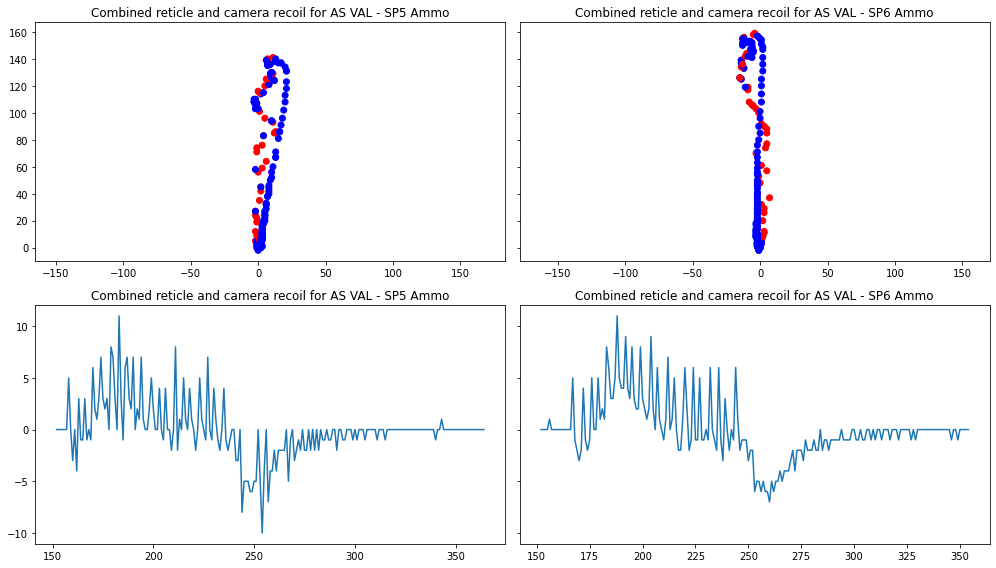

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharey='row')

# ------------------------------- Gun 1: -------------------------------
file = "recoil data/asval_sp5.json"
name = "AS VAL - SP5 Ammo"
gun = file.split("_")[0]
df = get_recoil_pattern(file, start_index=150)
print(f"The max recoil height for {name} was {df.combined_y.max():.0f}")

# Spray pattern plotted:
axs[0][0].scatter(df.combined_x, df.combined_y, c=df.combined_y_color)
axs[0][0].set_title(f"Combined reticle and camera recoil for {name}")
axs[0][0].axis('equal')

# Movement plotted:
axs[1][0].plot(df.index, df.combined_y_move)
axs[1][0].set_title(f"Combined reticle and camera recoil for {name}")

# ------------------------------- Gun 2: -------------------------------
file = "recoil data/asval_sp6.json"
name = "AS VAL - SP6 Ammo"
gun = file.split("_")[0]
df = get_recoil_pattern(file, start_index=150)
print(f"The max recoil height for {name} was {df.combined_y.max():.0f}")

# Spray pattern plotted:
axs[0][1].scatter(df.combined_x, df.combined_y, c=df.combined_y_color)
axs[0][1].set_title(f"Combined reticle and camera recoil for {name}")
axs[0][1].axis('equal')

# Movement plotted:
axs[1][1].plot(df.index, df.combined_y_move)
axs[1][1].set_title(f"Combined reticle and camera recoil for {name}")

fig.tight_layout()

plt.show()